In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
fashion = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

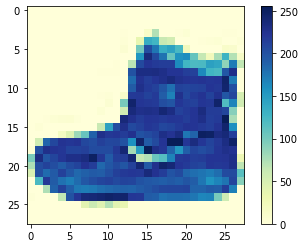

In [6]:
# Show example from dataset

plt.figure()
plt.imshow(X_train[0], cmap='YlGnBu')
plt.colorbar()
plt.grid(False)

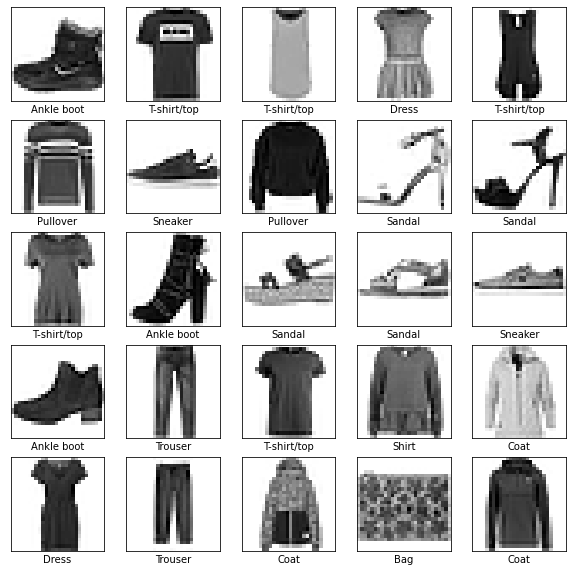

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [8]:
# Scale features

X_train = X_train / 255.0
X_test = X_test / 255.0

## Train Neural Network

In [9]:
# Set up neural network

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10)
])

model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [10]:
# Train neural network

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6310 - accuracy: 0.7814
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3926 - accuracy: 0.8591
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3364 - accuracy: 0.8780
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3109 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2962 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2841 - accuracy: 0.8943
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2566 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2428 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.241

<AxesSubplot:>

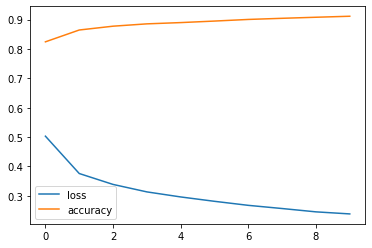

In [11]:
# Plot loss and accuracy

losses = pd.DataFrame(model.history.history)
losses.plot()

## Model Evaluation

In [29]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(X_test)

In [13]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


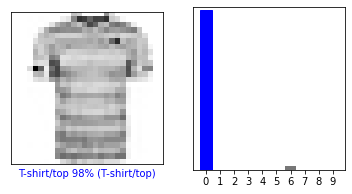

In [16]:
i = 35
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)


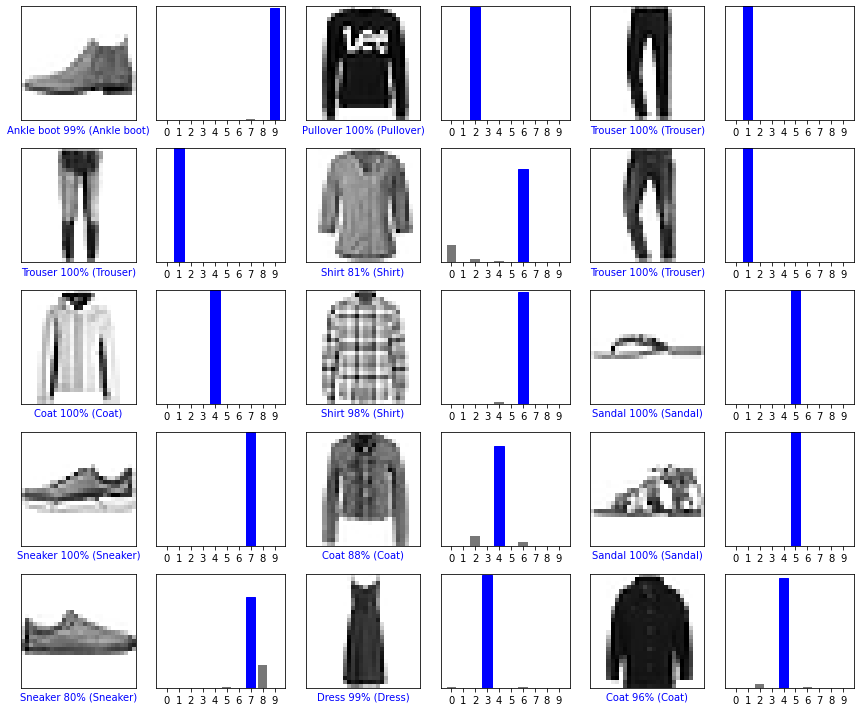

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()

In [30]:
pred = pd.DataFrame(predictions)
pred = pred.apply(lambda row: np.argmax(row), axis=1)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.79      0.79      0.79      1000
           3       0.91      0.87      0.89      1000
           4       0.77      0.85      0.81      1000
           5       0.99      0.93      0.96      1000
           6       0.70      0.66      0.68      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.97      0.97      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

